# read/write adjacency matrix & edgelist by igraph/networkx

In [205]:
import pandas as pd
import numpy as np
import igraph as ig


In [206]:

data = np.loadtxt('data/graph.txt', dtype=np.float32) # adjacency matrix
matrix = pd.DataFrame(data)

m = matrix.values # ndarray
g1 = ig.Graph.Adjacency((m > 0).tolist()) # default mode='directed'
g1.es['weight'] = m[m.nonzero()]
ig.plot(g1)

g1.write_adjacency('data/graph_adjacency.txt')
g1.write_edgelist('data/graph_edgelist.txt')
g1.write_pajek('data/graph_pajek.txt')


In [207]:

import networkx as nx
import matplotlib.pyplot as plt


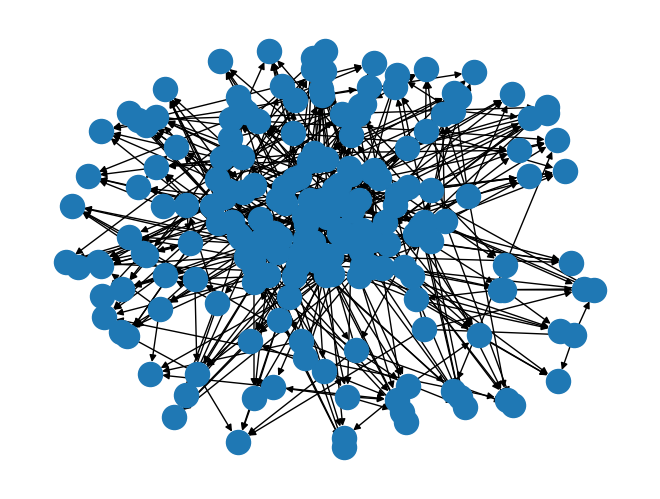

In [208]:

g1 = g1.get_edgelist()
g2 = nx.DiGraph(g1)
nx.draw(g2)
plt.show()


# pagerank

In [209]:

G = nx.barabasi_albert_graph(60,41)
pr = nx.pagerank(G)
print(pr)


{0: 0.03599988783992225, 1: 0.009784152731565056, 2: 0.01082322514898917, 3: 0.010296968231241103, 4: 0.01030216824950146, 5: 0.007180918856481317, 6: 0.011345694178063033, 7: 0.010297852942656428, 8: 0.01082359553296005, 9: 0.009258568887703336, 10: 0.009261914776469708, 11: 0.011342238882493128, 12: 0.01134668604777645, 13: 0.008743144124493745, 14: 0.010306041317976527, 15: 0.0087423286341913, 16: 0.010298631510982825, 17: 0.00977795691296101, 18: 0.010822224573483526, 19: 0.010301818771680522, 20: 0.011342093667981388, 21: 0.010826849389186577, 22: 0.008736484566121857, 23: 0.01186793526301179, 24: 0.009262752438308926, 25: 0.01238805806919435, 26: 0.010820852628210793, 27: 0.009253697002188182, 28: 0.010819752846668198, 29: 0.009257551983112875, 30: 0.011346215659288002, 31: 0.009775980173898692, 32: 0.011342093667981388, 33: 0.009261315898667112, 34: 0.00926248433688152, 35: 0.011343840107752304, 36: 0.011341387632026528, 37: 0.011341713146826249, 38: 0.011867668279890355, 39: 0.

# louvain

In [210]:
import community as community_louvain
import matplotlib.cm as cm

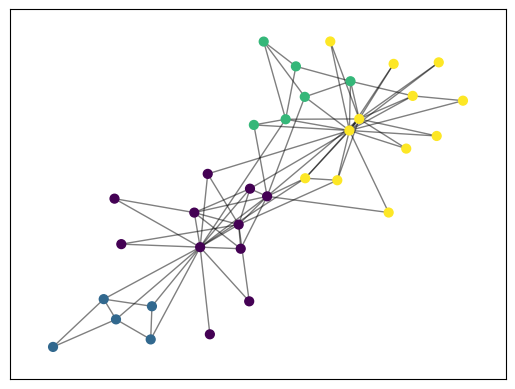

In [211]:

# load the karate club graph
G = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# generate network

MultiGraph with 50 nodes and 280 edges


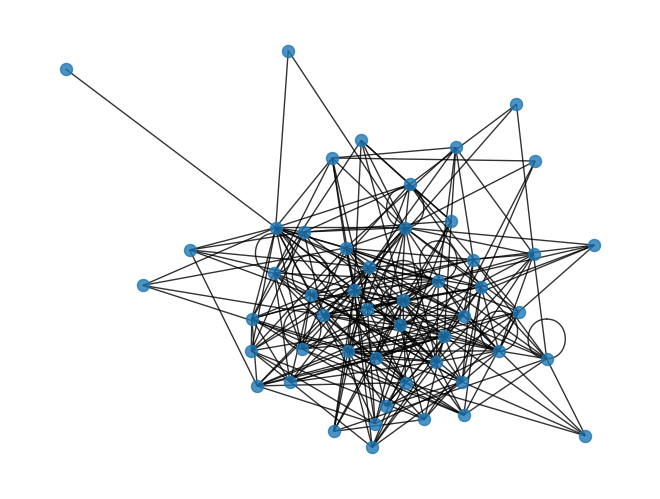

In [212]:
import random

def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)} # {0:[], 1:[], 2:[], ..., n-1:[]}
    nodes = list(range(n)) # [0, 1, 2, 3, ..., n-1]
    
    # generate edges
    for n, edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes)/2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = 50
G = generate_network(n)
print(G)

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

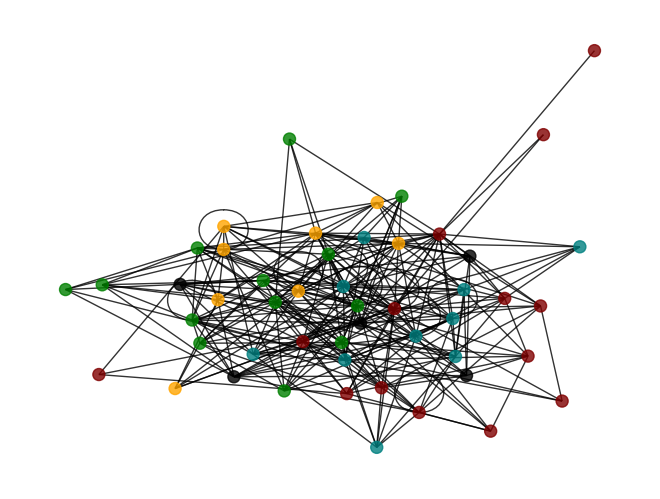

In [213]:
comms = community_louvain.best_partition(G)

unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

# girvan_newman

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


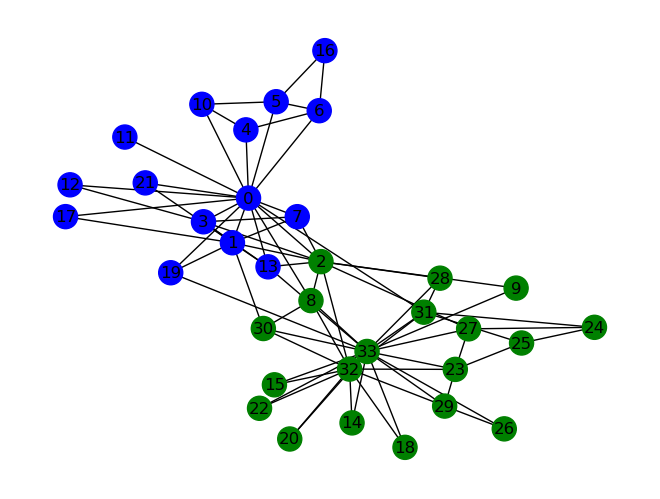

In [214]:
from networkx.algorithms.community.centrality import girvan_newman
 
G = nx.karate_club_graph()
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# 1-d random walk

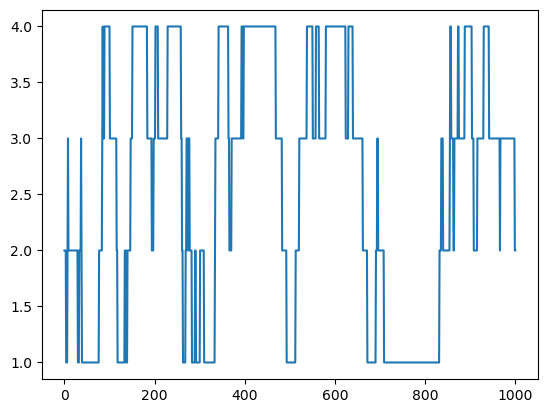

In [215]:
# Python code for 1-D random walk

# Probability to move up or down
prob = [0.05, 0.95] 
 
# statically defining the starting position
start = 2 
positions = [start]
 
# creating the random points
rr = np.random.random(1000)
downp = rr < prob[0]
upp = rr > prob[1]
 
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up)
 
# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.show()

# 2-d random walk

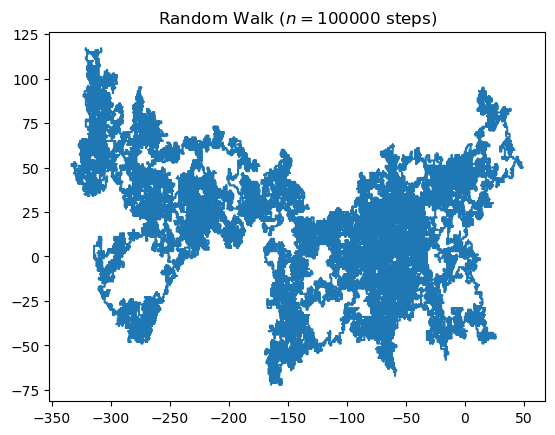

In [216]:
# Python code for 2D random walk.
 
# defining the number of steps
n = 100000
 
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = np.zeros(n)
y = np.zeros(n)
 
# filling the coordinates with random variables
for i in range(1, n):
    val = random.randint(1, 4) # 1 <= val <= 4 
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
     
 
# plotting stuff:
plt.title("Random Walk ($n = " + str(n) + "$ steps)")
plt.plot(x, y)
# plt.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
plt.show()